# Cross tabulation

Dependence of two categorical variables can be studied using cross tabulation.

In [2]:
### First we import necessary libraries.

import pandas as pd
import matplotlib.pyplot as plt


### Style has effect on layout of the graphics.
### Available styles can be listed with the command plt.style.available
### We use the following style

plt.style.use('seaborn-whitegrid')

In [3]:
### Opening the data and reading it into a dataframe

df = pd.read_excel('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/data1_en.xlsx')

### LEt's have a view at the beginning of the data

df.head()

,number,sex,age,family,education,empl_years,salary,management,colleagues,environment,salary_level,duties,occu_health,timeshare,gym,massage
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [4]:
### Create lists of variables using the defined text format

education = ['Comprehensive school', 'Upper secondary school', 'Academic degree', 'Higher academic degree']

sex = ['Male', 'Female']

In [6]:
### cross tabulation in numbers

df1 = pd.crosstab(df['education'], df['sex'])

### If you view the result, you see it's necessary to redefine the headers

df1.index = education
df1.columns = sex

df1

,Male,Female
Comprehensive school,22,5
Upper secondary school,23,7
Academic degree,15,7
Higher academic degree,2,0


In next examples parameters for cross tabulation are introduced.

In [12]:
### Cross tabulation and and percentages (normalize) calculated from column totals

df2 = pd.crosstab(df['education'], df['sex'], normalize = 'columns') * 100

### Obviously polishing is needed in the dataframe df2

df2.index = education
df2.columns = sex

### Finally tune the number formats

df2.style.format('{:.1f} %')

,Male,Female
Comprehensive school,35.5 %,26.3 %
Upper secondary school,37.1 %,36.8 %
Academic degree,24.2 %,36.8 %
Higher academic degree,3.2 %,0.0 %


In [13]:
### Let's continue the previous example
### We obviously need to add the n-values

df3 = pd.crosstab(df['education'], df['sex'], normalize = 'columns') * 100

df3.index = education
df3.columns = sex

### We bring the n-values to the columns using the previous table with calculated numbers (df1)

for var in df3.columns:
    df3 = df3.rename(columns = {var : var + ', n=' + str(df1[var].sum())})
    
### Finally tune the number formats

df3.style.format('{:.1f} %')

,"Male, n=62","Female, n=19"
Comprehensive school,35.5 %,26.3 %
Upper secondary school,37.1 %,36.8 %
Academic degree,24.2 %,36.8 %
Higher academic degree,3.2 %,0.0 %


Next we introduce graphics related to the cross tabulation.

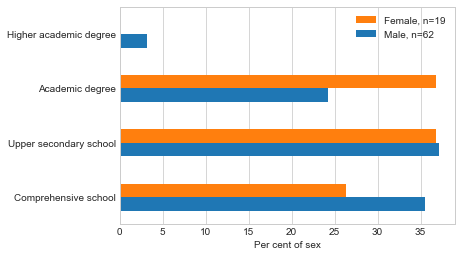

In [14]:
### Draw the previous calculations as bars; the parameter legend='reverse' turn thr order of the legends

df3.plot.barh(legend = 'reverse')

### Title for the horisontal axis

plt.xlabel('Per cent of sex')

### The used style seaborn-whitegrid includes both horisontal and vertical background grids.
### Here we only want to use the vertical grids.

plt.grid(axis = 'y')

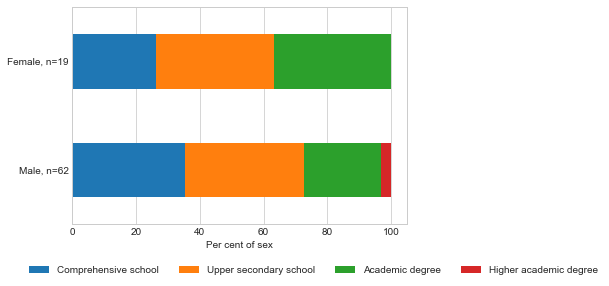

In [19]:
### Next draw the previous as 100 per cent stack bars.
### The parameter T changes the rows and columns (values and categories) of a table 

df3.T.plot.barh(stacked = True)

### Obviously the result needs be improved.

### Add the horisontal axis title
plt.xlabel('Per cent of sex')

### Show only vertical grids.

plt.grid(axis = 'y')

### ¨Placing the legends with respect to the origin

plt.legend(loc=(-0.14, -0.25), ncol = 4)

## Is the depence seen in cross tabbing statistically significant?

When conclusions about bigger population are considered based on results calculated from smaller samples of the population, issues about statistical significance need to be considered. For instance, dependencies in a sample may be too small in order to be generalized to the bigger population, where the sample is chosen from. There might be a dependence caused by sampling error (randomness) in question. 

Dependence is called statistically significant if it can be generalized to a bigger population the sample is chosen from. Significance of depence can be tested by calculating the so-called <strong>p-value</strong>. The smaller the p-value is, the more significant is the dependence. Standard practice is that p-values below 0,05, i.e. 5 %, are considered signs of dependences that are statistically significant. 

P-value related to cross tabulation can be calculated with the so-called chi squared test (chi2_contingency). The values returned by the test are chi squared, the p-value and dgerees of freedom (here abbreviated as df).

In [21]:
### Import the necessary libraries 

from scipy.stats import chi2_contingency

### Note that chi squared test is always calculated from the numbers of occurrencies. Always.
### So here we use the dataframe df1 where the numbers are calculated.

chi2_contingency(df1)

(1.836533415650563,
 0.6070173075042058,
 3,
 array([[20.66666667,  6.33333333],
        [22.96296296,  7.03703704],
        [16.83950617,  5.16049383],
        [ 1.5308642 ,  0.4691358 ]]))

The result of the above chi squared test is interpreted as follows: <br />
Dependence is not statistically significant, chi squared is 1,84, p-value is 0,607, degrees of freedom is 3.

In the result of the contingency test also expected variances are shown; that is, variances in a hypothetical situation where no dependencies exist.

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>